In [27]:
import pandas as pd
from matplotlib import pyplot as plt
from IPython import display
%matplotlib inline
display.set_matplotlib_formats('svg')
plt.style.use('ggplot') #设置ggplot
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置中文

In [4]:
df1 = pd.read_csv('D:/数据科学/淘宝数据/SQL/用户F值.csv',encoding='gbk')
df1

,用户ID,购买次数,F值
0,100,8,2
1,1000001,1,1
2,1000011,2,1
3,1000014,2,1
4,100002,1,1
...,...,...,...
134977,999976,1,1
134978,999981,2,1
134979,999983,3,1
134980,999985,4,1


In [5]:
df2 = pd.read_csv('D:/数据科学/淘宝数据/SQL/用户R值.csv',encoding='gbk')
df2

,用户ID,最近购买时间,R值
0,1000011,2017-11-25,1
1,1000374,2017-11-25,1
2,1000556,2017-11-25,1
3,1000623,2017-11-25,1
4,1000709,2017-11-25,1
...,...,...,...
134976,999803,2017-12-03,4
134977,999809,2017-12-03,4
134978,999837,2017-12-03,4
134979,999858,2017-12-03,4


In [17]:
df = pd.merge(df1,df2,on='用户ID')
def 用户层级(f,r):
    if r>3 and f>1:
        return '重要价值客户'
    if r>3 and f<=1:
        return '重要发展客户'
    if r<=3 and f>1:
        return '重要保留客户'
    else: return '重要挽留客户'
    
df['用户层级']=df.apply(lambda x:用户层级(x.F值,x.R值),axis=1)

In [20]:
from collections import Counter
print(Counter(df['用户层级']))


Counter({'重要发展客户': 58350, '重要挽留客户': 52564, '重要价值客户': 19359, '重要保留客户': 4708})


<AxesSubplot:xlabel='用户层级,用户层级'>

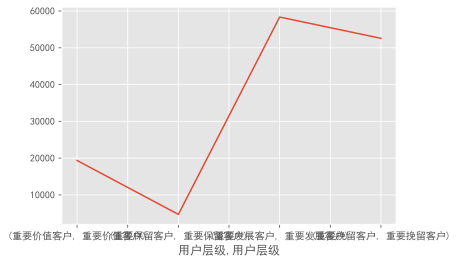

In [28]:
df.groupby('用户层级')['用户层级'].value_counts().plot()